In [691]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read dataset


In [692]:
df1 = pd.read_csv("Expense Data 1.csv")

In [693]:
df2 = pd.read_csv("Expense Amount Data 1.csv")

In [694]:
df1

,Expense Code,Month,Expense Quantity,Government Entity
0,10003,42948,1530,Ministry of Education
1,10003,42979,3060,Ministry of Education
2,10007,42917,1792,Ministry of Health
3,10007,42979,2048,Ministry of Health
4,10007,43132,1024,Ministry of Health
...,...,...,...,...
17080,9990,42856,2700,Ministry of Health
17081,9990,43160,100,Ministry of Health
17082,9996,42826,7800,Ministry of Energy
17083,9996,43009,5200,Ministry of Energy


In [695]:
df2

,Expense Code,Expense Amount (SAR)
0,10532,4.46
1,10640,6.84
2,11053,0.36
3,11291,2.47
4,11436,1.70
...,...,...
3782,9827,10.45
3783,9838,4.41
3784,9859,5.12
3785,9920,0.42


# Merged Method

In [696]:
merged=df1.merge(df2, on=['Expense Code'])

In [697]:
merged.head()

,Expense Code,Month,Expense Quantity,Government Entity,Expense Amount (SAR)
0,10003,42948,1530,Ministry of Education,4.48
1,10003,42979,3060,Ministry of Education,4.48
2,10007,42917,1792,Ministry of Health,8.82
3,10007,42979,2048,Ministry of Health,8.82
4,10007,43132,1024,Ministry of Health,8.82


In [698]:
merged.shape

(17085, 5)

#  Information about dataset

In [699]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expense Code          17085 non-null  int64  
 1   Month                 17085 non-null  object 
 2   Expense Quantity      17083 non-null  object 
 3   Government Entity     17085 non-null  object 
 4   Expense Amount (SAR)  17085 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 800.9+ KB


#  Data Cleaning

In [700]:
merged.isna().sum()

Expense Code            0
Month                   0
Expense Quantity        2
Government Entity       0
Expense Amount (SAR)    0
dtype: int64

In [701]:
merged = merged.fillna(value = 0)

In [702]:
merged.isna().sum()

Expense Code            0
Month                   0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
dtype: int64

In [703]:
merged.duplicated().sum()

0

# Data Preprocessing

In [704]:
# Convert the string to an integer
merged['Expense Quantity'] = pd.to_numeric(merged['Expense Quantity'], errors='coerce').fillna(0, downcast='infer')

In [705]:
# Convert the Month
merged['Date']=pd.to_datetime(pd.to_numeric(merged['Month'],errors='coerce'),errors='coerce',origin='1899-12-30',unit='D')

merged['Date']


0       2017-08-01
1       2017-09-01
2       2017-07-01
3       2017-09-01
4       2018-02-01
           ...    
17080   2017-05-01
17081   2018-03-01
17082   2017-04-01
17083   2017-10-01
17084   2018-04-01
Name: Date, Length: 17085, dtype: datetime64[ns]

In [706]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Month                 17085 non-null  object        
 2   Expense Quantity      17085 non-null  int64         
 3   Government Entity     17085 non-null  object        
 4   Expense Amount (SAR)  17085 non-null  float64       
 5   Date                  17083 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 934.3+ KB


In [707]:
merged.drop('Month',axis = 1 , inplace = True)

In [708]:
merged.isna().sum()

Expense Code            0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
Date                    2
dtype: int64

In [709]:
merged = merged.fillna(method = 'pad')

In [710]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Expense Quantity      17085 non-null  int64         
 2   Government Entity     17085 non-null  object        
 3   Expense Amount (SAR)  17085 non-null  float64       
 4   Date                  17085 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 800.9+ KB


In [711]:
merged.isna().sum()

Expense Code            0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
Date                    0
dtype: int64

In [712]:
merged.head()

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR),Date
0,10003,1530,Ministry of Education,4.48,2017-08-01
1,10003,3060,Ministry of Education,4.48,2017-09-01
2,10007,1792,Ministry of Health,8.82,2017-07-01
3,10007,2048,Ministry of Health,8.82,2017-09-01
4,10007,1024,Ministry of Health,8.82,2018-02-01


In [713]:
merged.describe()

,Expense Code,Expense Quantity,Expense Amount (SAR)
count,17085.000000,1.708500e+04,17085.000000
mean,11547.052853,1.117046e+04,5.590861
std,8484.425473,1.580309e+05,2.940233
min,4.000000,-2.345400e+04,0.010000
25%,2656.000000,2.460000e+02,3.060000
50%,11522.000000,9.450000e+02,5.670000
75%,20573.000000,3.520000e+03,8.060000
max,23429.000000,1.096966e+07,10.990000


In [714]:
merged['Government Entity'].value_counts()

Ministry of Energy       7089
Ministry of Health       5121
Ministry of Education    3592
Ministry of Housing      1283
Name: Government Entity, dtype: int64

In [715]:
merged['Expense Amount (SAR)'].value_counts()

7.06     75
1.58     75
9.01     74
2.47     68
7.82     66
         ..
10.65     1
4.27      1
1.59      1
10.67     1
0.29      1
Name: Expense Amount (SAR), Length: 1058, dtype: int64

In [716]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Expense Quantity      17085 non-null  int64         
 2   Government Entity     17085 non-null  object        
 3   Expense Amount (SAR)  17085 non-null  float64       
 4   Date                  17085 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 800.9+ KB


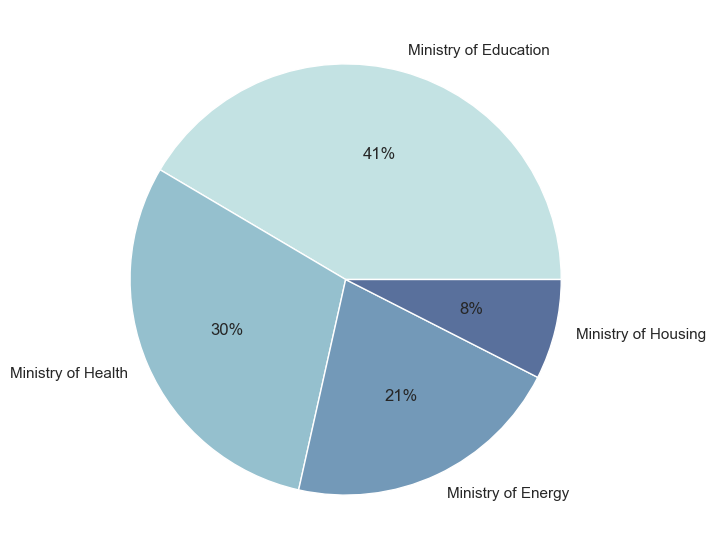

In [717]:
colors = sns.color_palette("ch:start=.2,rot=-.3")[0:5]
plt.figure (figsize=(10,7))
plt.pie(round((merged['Government Entity'].value_counts()/merged.shape[0])*100,1), labels = merged['Government Entity'].unique(), colors = colors, autopct='%.0f%%')
plt.show()

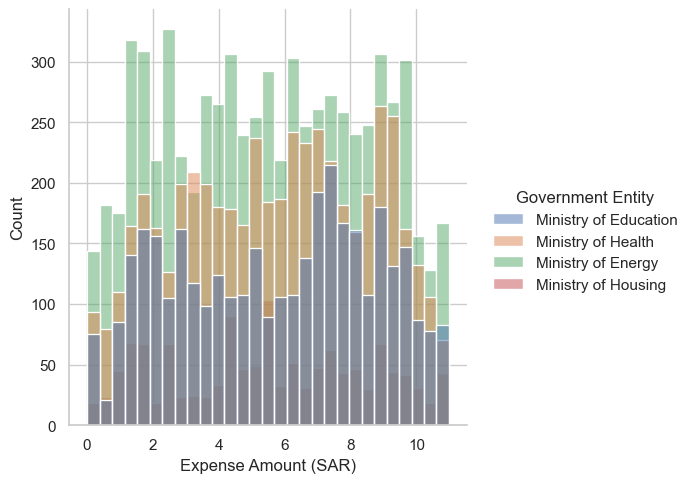

In [718]:
sns.set(style="whitegrid")
sns.displot(data=merged, x="Expense Amount (SAR)", hue="Government Entity" , kind = "hist")

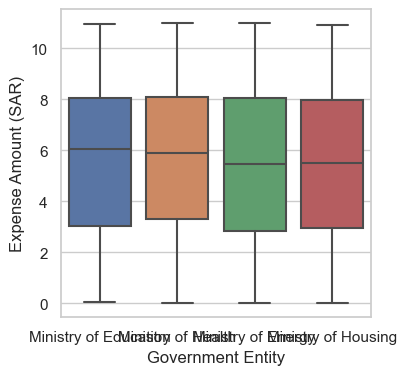

In [719]:
sns.boxplot(x='Government Entity', y='Expense Amount (SAR)' ,data= merged)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Count'>

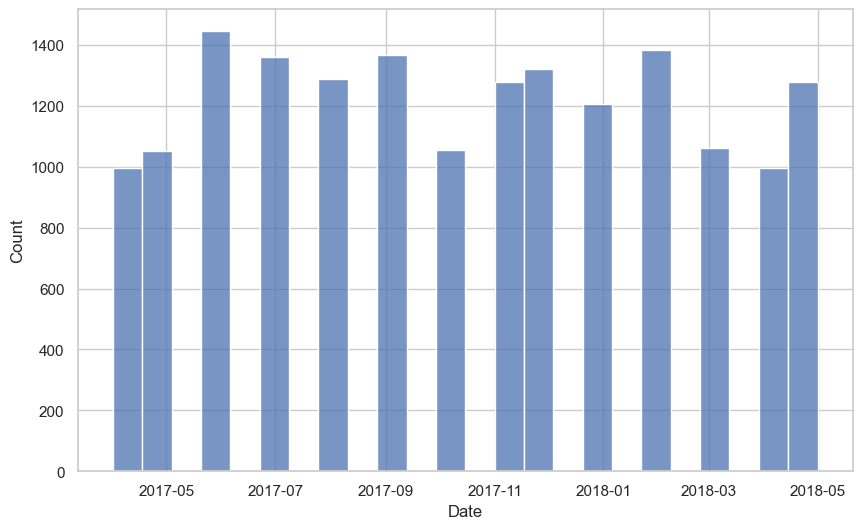

In [720]:
plt.figure(figsize = (10,6))
sns.histplot(data=merged, x="Date")

<Figure size 1000x600 with 0 Axes>

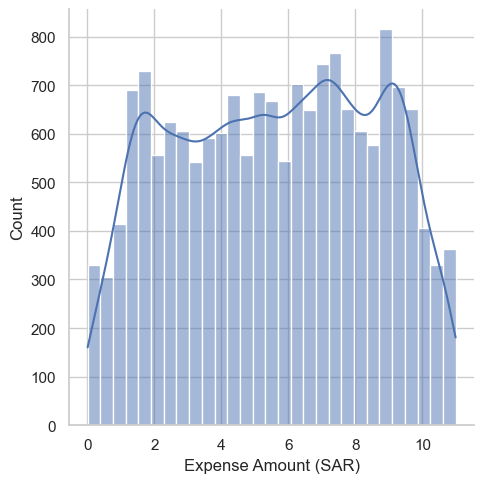

In [721]:
plt.figure(figsize = (10,6))
sns.displot(data=merged, x="Expense Amount (SAR)" , kde = 'hist')

<function matplotlib.pyplot.show(close=None, block=None)>

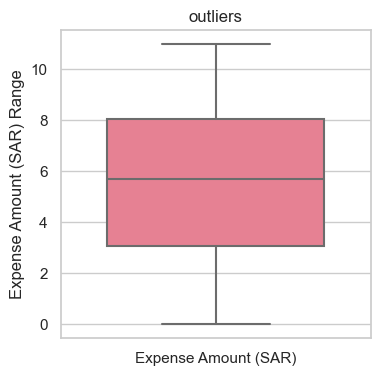

In [722]:
outliers= ['Expense Amount (SAR)']
plt.rcParams['figure.figsize']=[4,4]
sns.boxplot(data=merged[outliers],orient ="v",palette="husl", width= 0.7)
plt.title("outliers")
plt.ylabel("Expense Amount (SAR) Range")
plt.show

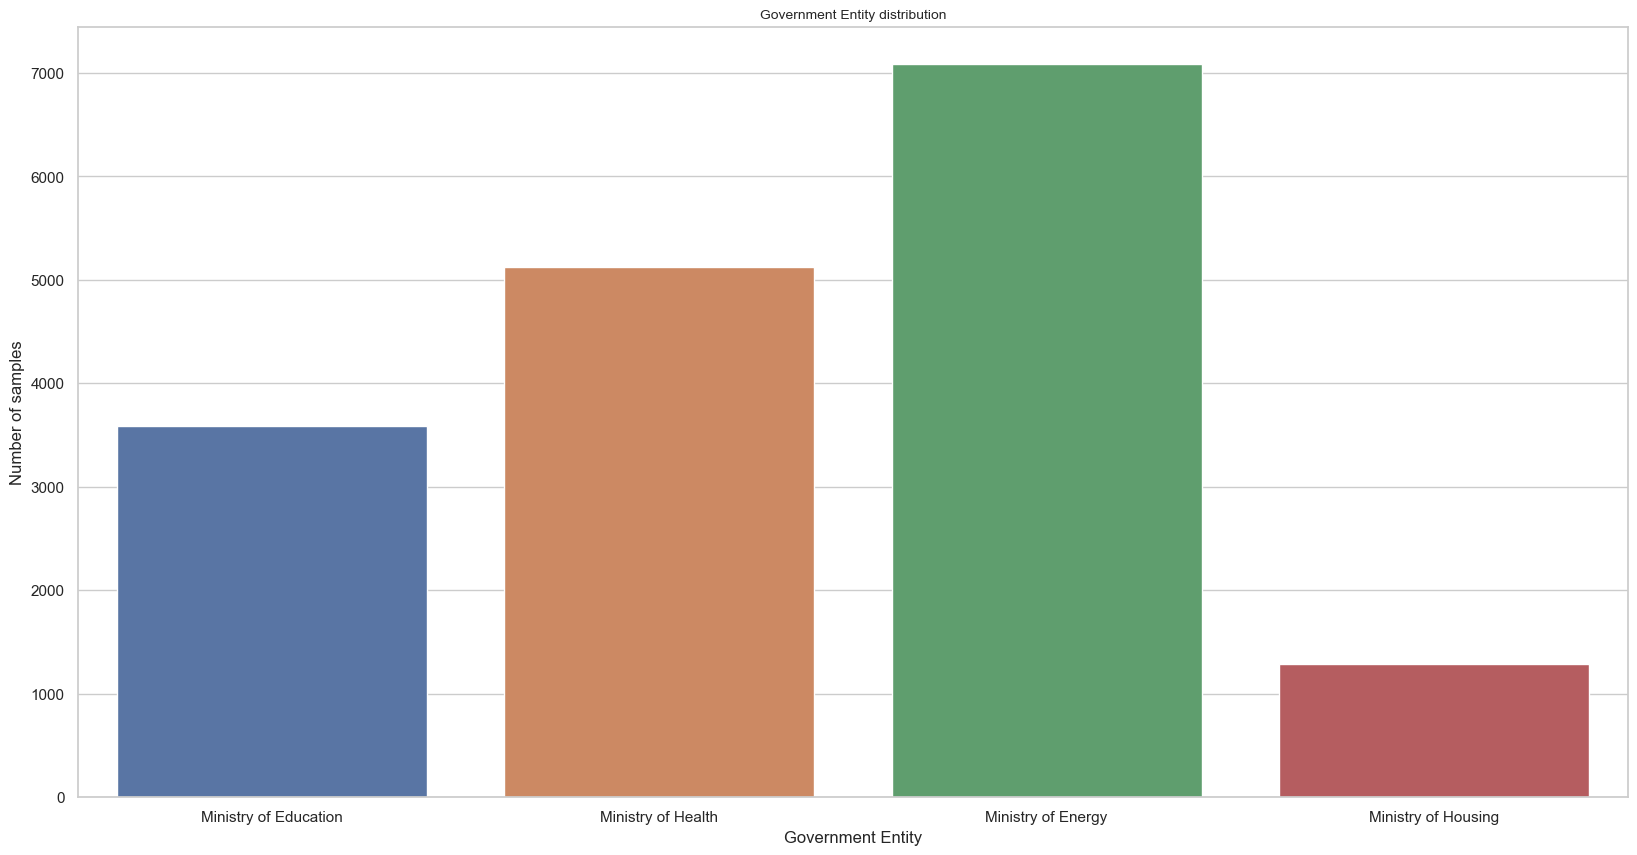

In [723]:
plt.figure(figsize=(20, 10));
sns.countplot(merged['Government Entity'])
plt.ylabel('Number of samples');
plt.title('Government Entity distribution', fontsize=10)
plt.savefig("Government Entity distribution", dpi=500)
plt.show();

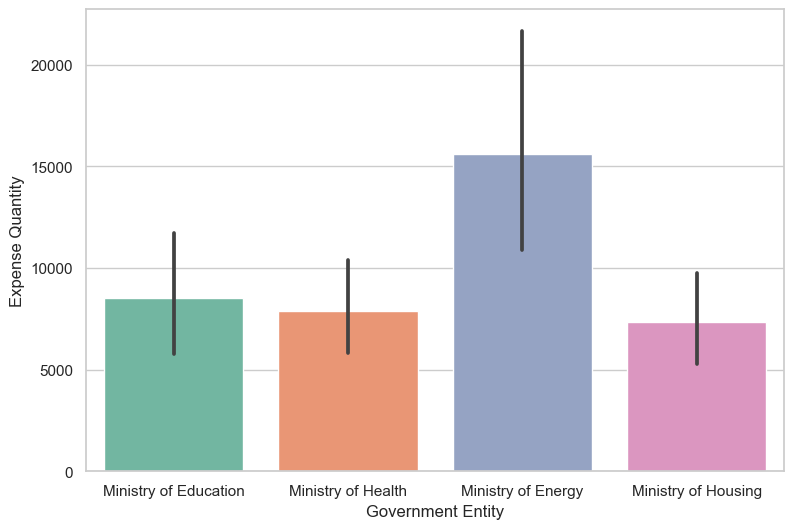

In [724]:
plt.figure(figsize=(9,6))
fig = sns.barplot(x='Government Entity',y='Expense Quantity',data=merged,palette='Set2')
plt.show(fig)
plt.close('all')
del fig

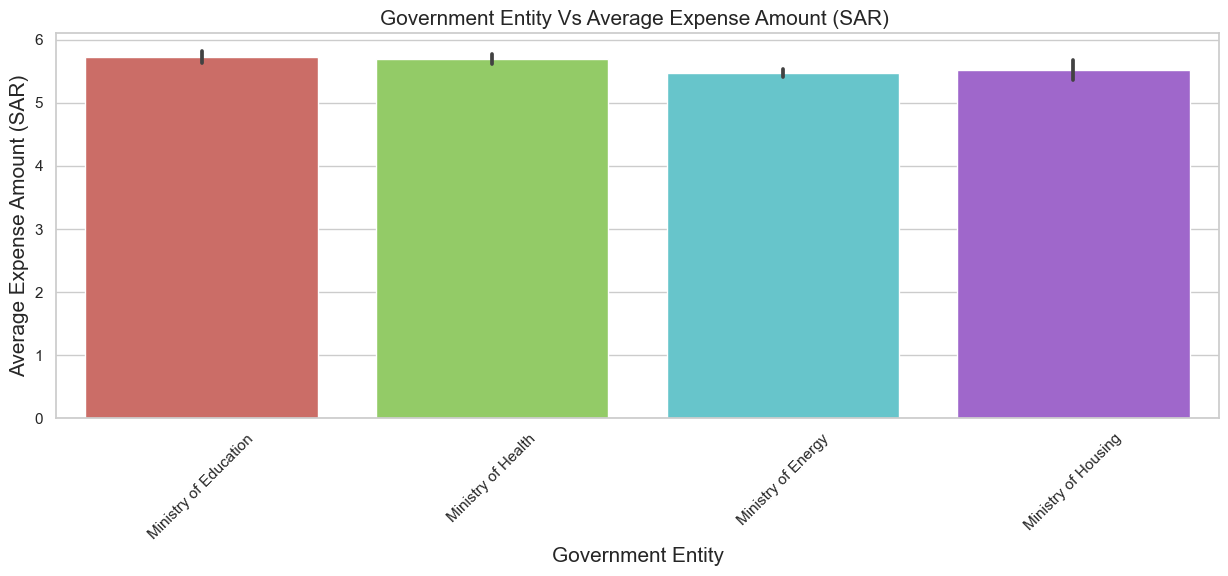

In [725]:
plt.figure(figsize=(15, 5))
sns.barplot(x= 'Government Entity', y='Expense Amount (SAR)', data=merged, palette='hls')
plt.title('Government Entity Vs Average Expense Amount (SAR) ', fontsize=15)
plt.xlabel('Government Entity', fontsize=15)
plt.ylabel('Average Expense Amount (SAR)', fontsize=15)
plt.xticks(rotation=45)  
plt.show()

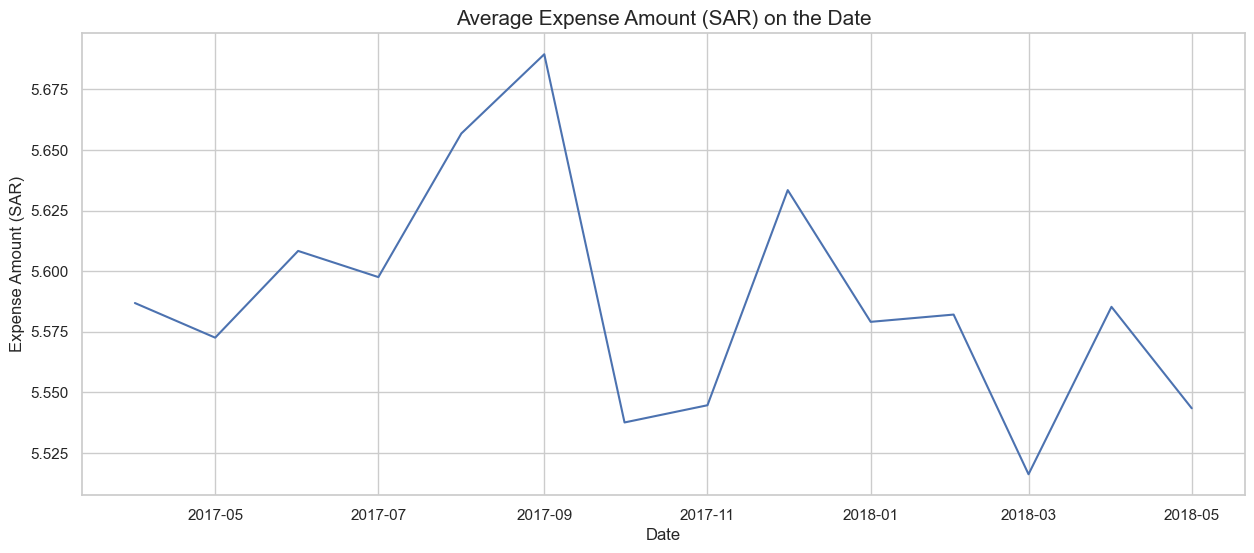

In [726]:
merged_temp = merged.groupby(['Date'])['Expense Amount (SAR)'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="Date", y="Expense Amount (SAR)", data=merged_temp).set_title("Average Expense Amount (SAR) on the Date",fontsize=15)

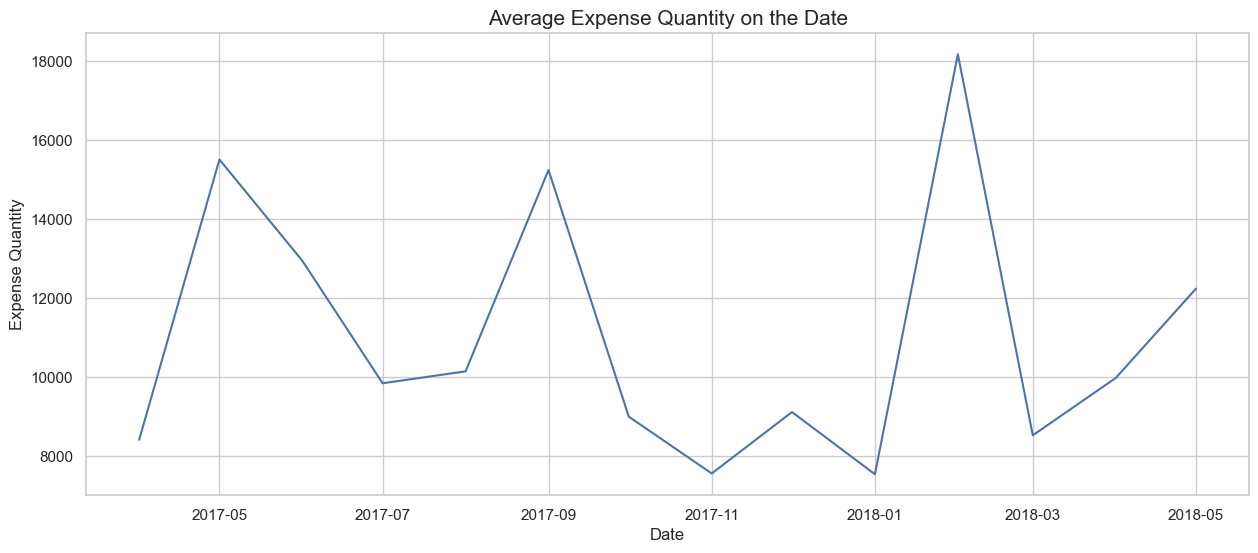

In [727]:
merged_temp = merged.groupby(['Date'])['Expense Quantity'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="Date", y="Expense Quantity", data=merged_temp).set_title("Average Expense Quantity on the Date",fontsize=15)

In [728]:
from sklearn.preprocessing import LabelEncoder
categorial_data=merged.select_dtypes(include='object').columns

In [729]:
for column in categorial_data:
    l_encoder = LabelEncoder()
    merged[column] = l_encoder.fit_transform(merged[column])

In [730]:
merged.head()

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR),Date
0,10003,1530,0,4.48,2017-08-01
1,10003,3060,0,4.48,2017-09-01
2,10007,1792,2,8.82,2017-07-01
3,10007,2048,2,8.82,2017-09-01
4,10007,1024,2,8.82,2018-02-01


In [731]:
merged.set_index('Date',inplace= True)
merged.head()

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR)
Date,,,,
2017-08-01,10003,1530,0,4.48
2017-09-01,10003,3060,0,4.48
2017-07-01,10007,1792,2,8.82
2017-09-01,10007,2048,2,8.82
2018-02-01,10007,1024,2,8.82


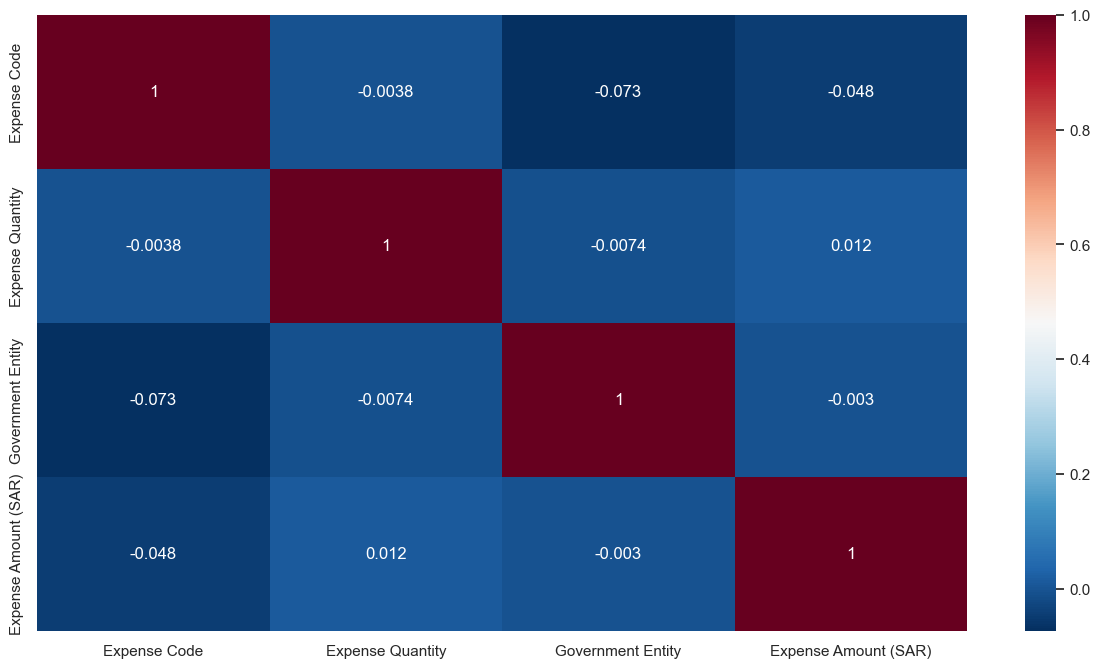

In [732]:
plt.figure(figsize = (15, 8))
sns.heatmap(merged.corr() ,annot=True, cmap='RdBu_r')
plt.show()

In [733]:
X = merged.drop('Expense Amount (SAR)', axis=1)  # Features
y =merged['Expense Amount (SAR)']  # Target variable



In [734]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [735]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [751]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11959, 3), (5126, 3), (11959,), (5126,))

In [748]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=10, random_state=52)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=52)

In [749]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

accuracy_train = rf.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

In [750]:
accuracy_test = rf.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9161947367960697 Test: 0.5169633532971051
MSE - Train: 0.7225621311982606 Test: 4.199916066133437
R2 - Train: 0.9161947367960697 Test: 0.5169633532971051


In [752]:
from xgboost import XGBRegressor

In [753]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [754]:
y_pred = xgb.predict(X_test)
y_pred

array([4.8609943, 9.303234 , 5.9369006, ..., 3.5694358, 7.214258 ,
       4.8024178], dtype=float32)

In [755]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Metrics")
print("=" * 40)
print(f"Mean Squared Error: {mse.round(4)}")
print(f"R² Score: {r2}")

Metrics
Mean Squared Error: 7.2493
R² Score: 0.16624813348762724


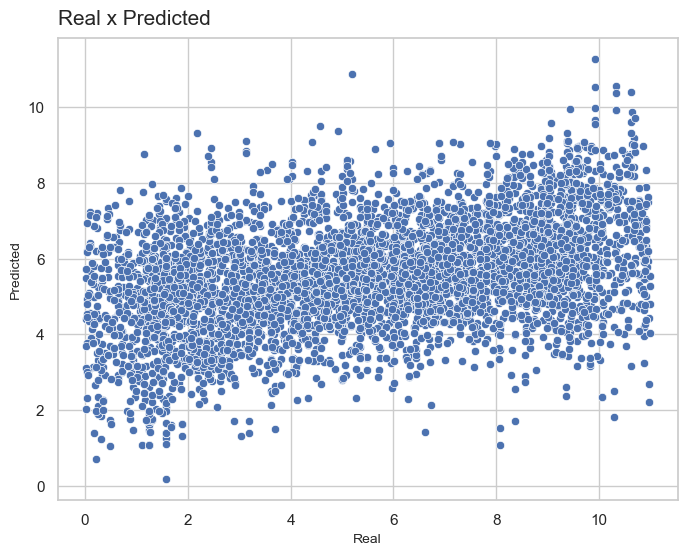

In [756]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.scatterplot(x = y_test, y = y_pred)
ax.set_title("Real x Predicted", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Real", fontsize = 10)
ax.set_ylabel("Predicted", fontsize = 10)

plt.show()